<a href="https://colab.research.google.com/github/nguyendoanquangnhat/CNN/blob/main/FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FINAL PROJECT - TRAFFIC SIGN DETECTION

In [1]:
from keras.utils import load_img,img_to_array
import numpy as np
from os import listdir
from numpy import asarray,save 
from keras import preprocessing

folder='/content/drive/MyDrive/TRAFFIC SIGNS'
photos,labels=list(),list()

for file in listdir(folder):
   if file.endswith('.jpg') or file.endswith('.png'):
     output=0
     if file.startswith('cr'):
       output=1
     elif file.startswith('dc'):
       output=2
     elif file.startswith('ne'):
       output=3
     elif file.startswith('ns'):
       output=4
     elif file.startswith('nt'):
       output=5
     elif file.startswith('p'):
       output=6
     elif file.startswith('r'):
       output=7
     elif file.startswith('sl'):
       output=8
     elif file.startswith('stop'):
       output=9
     elif file.startswith('tr'):
       output=10  
     photo=load_img(folder+'/'+file,target_size=(200,200))
     photo=img_to_array(photo)
     photos.append(photo)
     labels.append(output)

photos=asarray(photos)
labels=asarray(labels)

print(photos.shape,labels.shape)

save('trafficsign_photos.npy',photos)
save('trafficsign_labels.npy',labels)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(999, 200, 200, 3) (999,)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import pickle

lb=LabelBinarizer()
labels=lb.fit_transform(labels)
file=open('photo.data','wb')
pickle.dump((photos,labels),file)
file.close()

def load_data():
    file=open('photo.data','rb')
    (photos, labels)=pickle.load(file)
    file.close()
    return photos, labels

X,y=load_data()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [3]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (799, 200, 200, 3)
X_test: (200, 200, 200, 3)
y_train: (799, 10)
y_test: (200, 10)


In [4]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,LeakyReLU,Activation
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras import losses
   
classes=10

X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(200,200,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(256,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(512,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(1024,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(1024,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                    

In [5]:
batch_size=50
epochs=20

model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/20
16/16 [==============================] - 15s 264ms/step - loss: 2.4690 - accuracy: 0.1151
Epoch 2/20
16/16 [==============================] - 2s 104ms/step - loss: 2.2327 - accuracy: 0.1314
Epoch 3/20
16/16 [==============================] - 2s 104ms/step - loss: 1.7969 - accuracy: 0.3191
Epoch 4/20
16/16 [==============================] - 2s 109ms/step - loss: 1.4241 - accuracy: 0.4355
Epoch 5/20
16/16 [==============================] - 2s 108ms/step - loss: 1.1195 - accuracy: 0.5244
Epoch 6/20
16/16 [==============================] - 2s 106ms/step - loss: 0.9185 - accuracy: 0.6070
Epoch 7/20
16/16 [==============================] - 2s 105ms/step - loss: 0.8162 - accuracy: 0.6658
Epoch 8/20
16/16 [==============================] - 2s 105ms/step - loss: 0.6729 - accuracy: 0.6996
Epoch 9/20
16/16 [==============================] - 2s 104ms/step - loss: 0.5179 - accuracy: 0.7635
Epoch 10/20
16/16 [==============================] - 2s 105ms/step - loss: 0.4935 - accuracy: 0.792

In [6]:
model.save("/content/drive/MyDrive/AI/FINAL_PROJECT.h5")

In [7]:
class_name=['Crossroad Ahead','Deer Crossing','No Entry','No Stop','No U-Turn',
            'Parking Lot','Roundabout','Speed Limit','Stop','Turn Right Ahead']

1/1 [==============================] - 1s 849ms/step
This is a Deer Crossing Sign
1.0


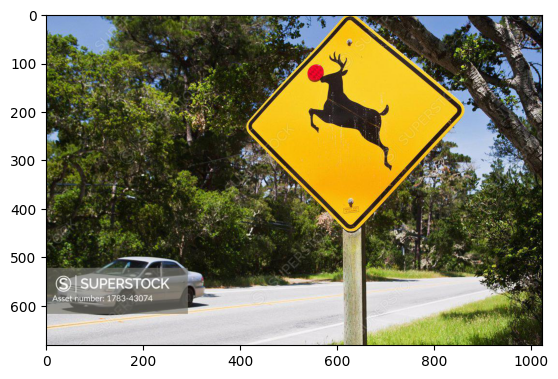

In [8]:
from keras.saving.saving_lib import load_model
import matplotlib.pyplot as plt
from keras.models import load_model

model=load_model("/content/drive/MyDrive/AI/FINAL_PROJECT.h5")

img=load_img('/content/drive/MyDrive/TRAFFIC SIGNS/dc10.jpg')
plt.imshow(img)
img=load_img('/content/drive/MyDrive/TRAFFIC SIGNS/dc10.jpg',target_size=(200,200))
img=img_to_array(img)
img=img.reshape(1,200,200,3)
img=img.astype('float32')
img=img/255
predict=model.predict(img)
print("This is a", class_name[np.argmax(predict[0])], "Sign")
print(np.max(predict[0],axis=0))

1/1 [==============================] - 0s 23ms/step
This is a No Entry Sign
0.99999917


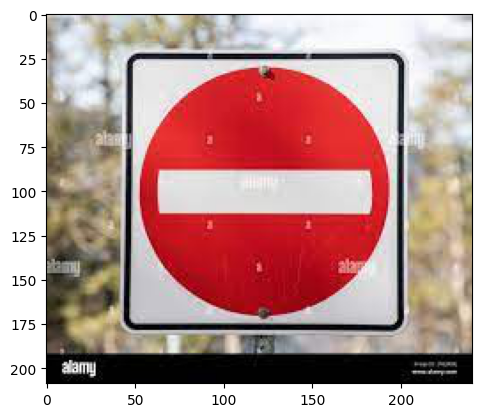

In [9]:
img1=load_img('/content/drive/MyDrive/TRAFFIC SIGNS/ne42.jpg')
plt.imshow(img1)
img1=load_img('/content/drive/MyDrive/TRAFFIC SIGNS/ne42.jpg',target_size=(200,200))
img1=img_to_array(img1)
img1=img1.reshape(1,200,200,3)
img1=img1.astype('float32')
img1=img1/255
predict=model.predict(img1)
print("This is a", class_name[np.argmax(predict[0])], "Sign")
print(np.max(predict[0],axis=0))

1/1 [==============================] - 0s 20ms/step
This is a Roundabout Sign
0.84604174


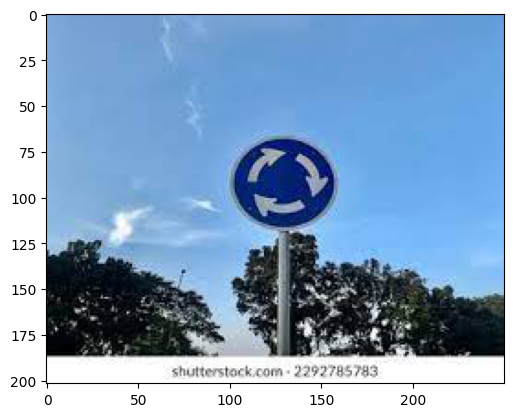

In [10]:
img2=load_img('/content/drive/MyDrive/TRAFFIC SIGNS/r30.jpg')
plt.imshow(img2)
img2=load_img('/content/drive/MyDrive/TRAFFIC SIGNS/r30.jpg',target_size=(200,200))
img2=img_to_array(img2)
img2=img2.reshape(1,200,200,3)
img2=img2.astype('float32')
img2=img2/255
predict=model.predict(img2)
print("This is a", class_name[np.argmax(predict[0])], "Sign")
print(np.max(predict[0],axis=0))

1/1 [==============================] - 0s 18ms/step
This is a Roundabout Sign
0.62174726


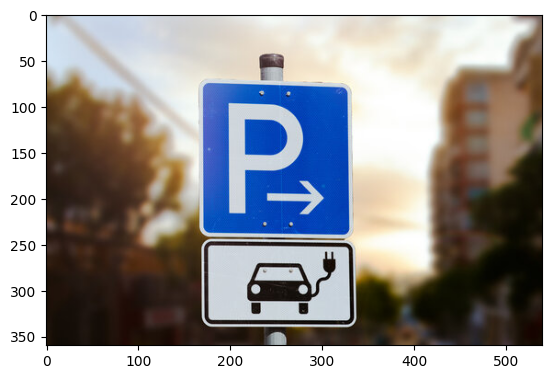

In [11]:
img3=load_img('/content/drive/MyDrive/TRAFFIC SIGNS/p17.jpg')
plt.imshow(img3)
img3=load_img('/content/drive/MyDrive/TRAFFIC SIGNS/p17.jpg',target_size=(200,200))
img3=img_to_array(img3)
img3=img3.reshape(1,200,200,3)
img3=img3.astype('float32')
img3=img3/255
predict=model.predict(img3)
print("This is a", class_name[np.argmax(predict[0])], "Sign")
print(np.max(predict[0],axis=0))

1/1 [==============================] - 0s 24ms/step
This is a Speed Limit Sign
0.9998437


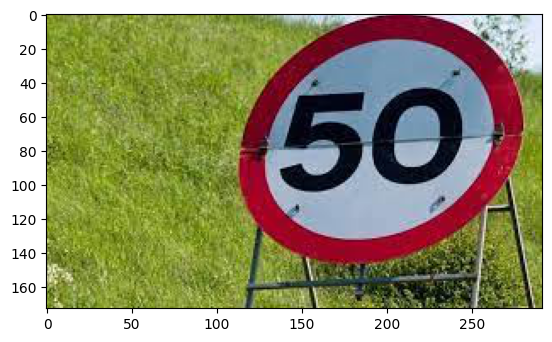

In [12]:
img4=load_img('/content/drive/MyDrive/TRAFFIC SIGNS/sl37.jpg')
plt.imshow(img4)
img4=load_img('/content/drive/MyDrive/TRAFFIC SIGNS/sl37.jpg',target_size=(200,200))
img4=img_to_array(img4)
img4=img4.reshape(1,200,200,3)
img4=img4.astype('float32')
img4=img4/255
predict=model.predict(img4)
print("This is a", class_name[np.argmax(predict[0])], "Sign")
print(np.max(predict[0],axis=0))